## Problem Statement

Identify the variables which are strong indicators of default and utilise this knowledge for company's portfolio and risk assessment.

### Import libraries

In [415]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Load dataset

In [416]:
df = pd.read_csv("data/loan.csv")
original_df = df.copy()

/home/rishav/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Summary statistics

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [418]:
df.shape

(39717, 111)

### Observations
- 39717 rows 
- 111 columns
    - float64(74), int64(13), object(24)

## Data Cleaning

- drop colummns with missing values > 80 %
- delete empty rows
- remove columns which have all the values same
- delete columns which shouldn't impact the target variable

### Drop colummns with missing values > 80 %

In [419]:
def get_missing_values(df, threshold=80):
    percent_missing = round(df.isnull().sum() / len(df)  * 100,2)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    missing_value_df = missing_value_df[missing_value_df['percent_missing'] > threshold].sort_values('percent_missing', ascending=False)
    return missing_value_df

missing_value_df = get_missing_values(df)
missing_value_df

,column_name,percent_missing
mo_sin_old_rev_tl_op,mo_sin_old_rev_tl_op,100.000
num_op_rev_tl,num_op_rev_tl,100.000
mort_acc,mort_acc,100.000
mths_since_recent_bc,mths_since_recent_bc,100.000
mths_since_recent_bc_dlq,mths_since_recent_bc_dlq,100.000
mths_since_recent_inq,mths_since_recent_inq,100.000
mths_since_recent_revol_delinq,mths_since_recent_revol_delinq,100.000
num_accts_ever_120_pd,num_accts_ever_120_pd,100.000
num_actv_bc_tl,num_actv_bc_tl,100.000
num_actv_rev_tl,num_actv_rev_tl,100.000


In [420]:
# drop columns with missing value > 80 %

cols = missing_value_df.column_name.to_list()
df = df.drop(columns=cols)

In [421]:
print("Columns after removing missing values columns: {}".format(len(df.columns)))

Columns after removing missing values columns: 55


### Delete empty nows

In [422]:
print('Number of empty Rows: {}'.format(df.isnull().all(axis=1).sum()))

Number of empty Rows: 0


### Remove columns which have all the values same

In [423]:
# columns with all values same
cols_with_same_values = list(df.columns[df.nunique() <= 1])
cols_with_same_values

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [424]:
# delete columns with same values
df = df.drop(columns=cols_with_same_values)

In [425]:
print("Columns after removing columns of same value: {}".format(len(df.columns)))

Columns after removing columns of same value: 46


### Delete columns which shouldn't impact the target variable - loan_status

#### Columns removed and reasons

- id, member_id --> ids don't 
- funded_amnt, funded_amnt_inv --> closely related to loan_amnt
- emp_title --> has too many categories
- int_rate --> interest rate depends on loan applied, we already have this info in `purpose column`  and interest rate varies in the loan tenure too if an installment is missed
- sub_grade --> this info is captured in grade
- emp_title --> too many categories
- issue_d, url, zip_code, addr_state,  --> has no relation with loan_status
- total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt, installment, mths_since_last_delinq, out_prncp, out_prncp_inv, earliest_cr_line --> can't be known about customer when applying loan
- desc, title --> info is caputured by purpose column
- earliest_cr_line, last_pymnt_d, last_credit_pull_d --> type is date




In [426]:
## Drop columns not needed for our analysis

cols_to_be_deleted = ['id', 'member_id', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment','sub_grade', 'emp_title',
       'issue_d', 'url', 'desc', 'title', 'zip_code',
       'addr_state', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'mths_since_last_delinq', 'collection_recovery_fee', 'earliest_cr_line',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'out_prncp']

df = df.drop(columns = cols_to_be_deleted)

In [427]:
print("Columns after removing columns which don't affect target variable: {}".format(len(df.columns)))

Columns after removing columns which don't affect target variable: 18


#### Important columns

- loan_amnt - amount of loan applied
- grade - a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest
- home_ownership 
- annual_inc
- delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- open_acc, total_acc - existing loans
- pub_rec - public record of not paid
- revol_bal, revol_util - money not fully paid, shifted to next cycle
- pub_rec_bankruptcies - Number of public record bankruptcies
- purpose - pupose of loan

#### Less Important columns
- loan_amt - 
- emp_length - work experience
- verification_status - physically verified or not

In [428]:
df.columns

Index(['loan_amnt', 'term', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [429]:
get_missing_values(df, 1)

,column_name,percent_missing
emp_length,emp_length,2.710
pub_rec_bankruptcies,pub_rec_bankruptcies,1.750


## Data Preprocessing
    - Handle numerical column with categorical data (term, revol_util)
    - change data type
        pub_rec_bankruptcies --> int to object

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
loan_amnt               39717 non-null int64
term                    39717 non-null object
grade                   39717 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
dti                     39717 non-null float64
delinq_2yrs             39717 non-null int64
inq_last_6mths          39717 non-null int64
open_acc                39717 non-null int64
pub_rec                 39717 non-null int64
revol_bal               39717 non-null int64
revol_util              39667 non-null object
total_acc               39717 non-null int64
pub_rec_bankruptcies    39020 non-null float64
dtypes: float64(3), int64(7), object(8)
memory usage: 5.5+ MB


### Handle numerical column with categorical data

In [431]:
df['revol_util_percentage'] = df['revol_util'].apply(lambda value : float(str(value).replace("%", "").strip()))
df = df.drop(columns=["revol_util"])

### Change data type

In [432]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype('object')

## Univariate Analysis

### 1. How the target variable loan_status is distributed

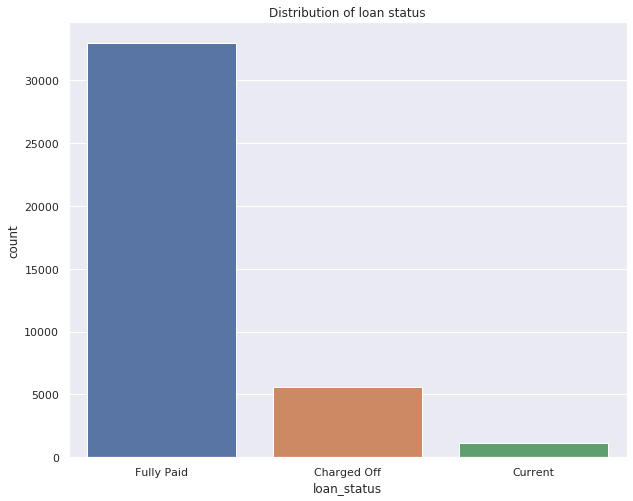

In [433]:
plt.title("Distribution of loan status")
sns.countplot(x=df['loan_status'])

In [434]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [435]:
df = df.loc[df['loan_status'] != 'Current']

In [436]:
print("Percentage of defaulters : {}%".format(round(5627/32950 * 100), 2))

Percentage of defaulters : 17%


### Observations

- 1140 people are in the process of paying the instalments, we need the data for people who have either defaulted to paid their loan
- So we can remove rows for loan_status = 'current'

### Univariate analysis of all features that we think will affect loan_status
- The purpose here is to view the values distribution of features

/media/data/anaconda3/envs/upgrad/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


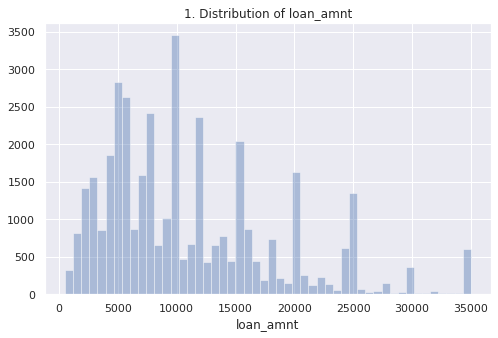

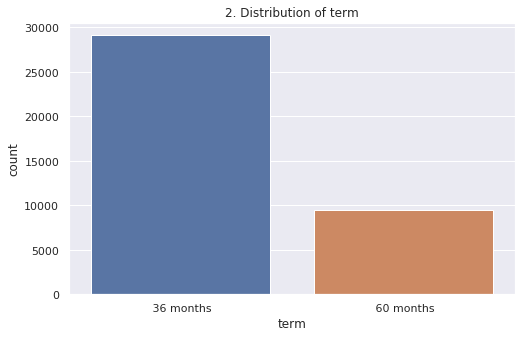

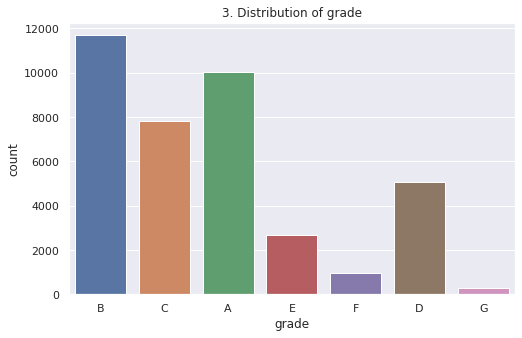

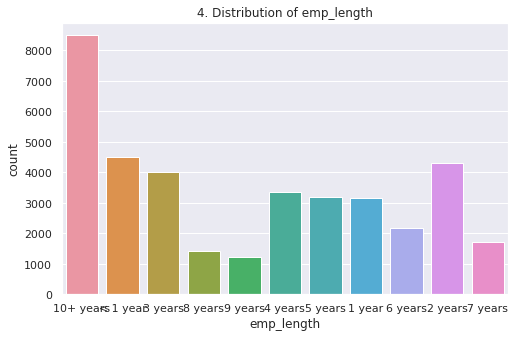

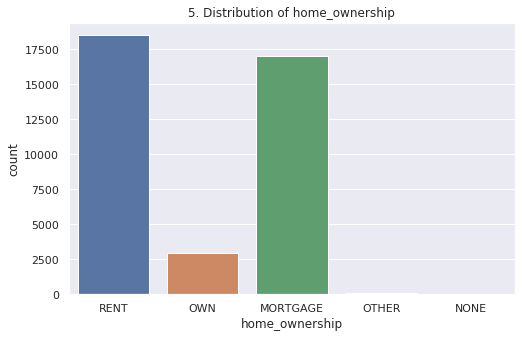

/media/data/anaconda3/envs/upgrad/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


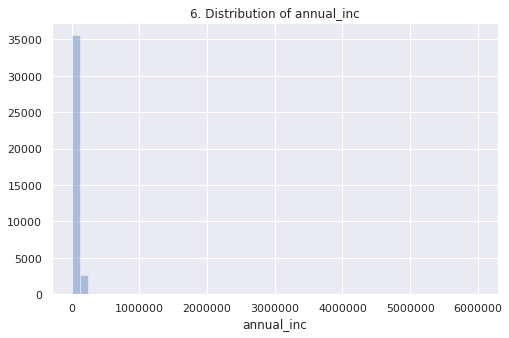

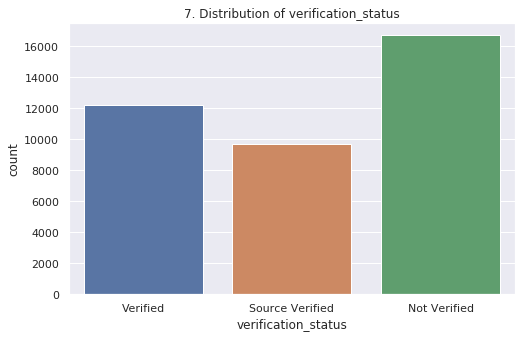

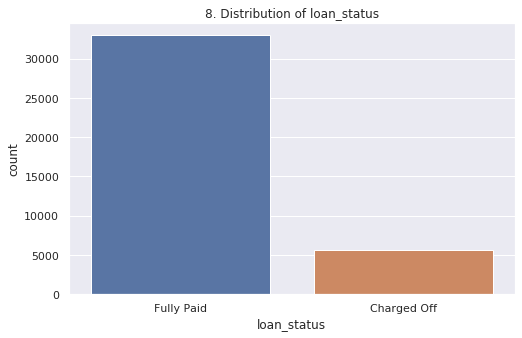

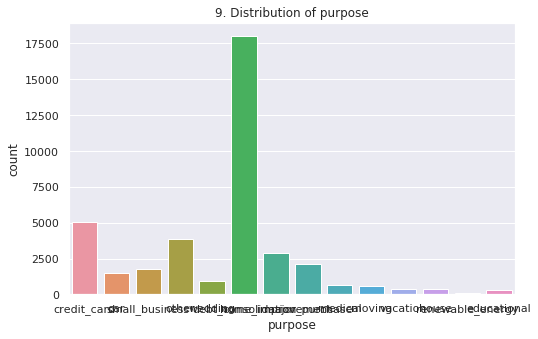

/media/data/anaconda3/envs/upgrad/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


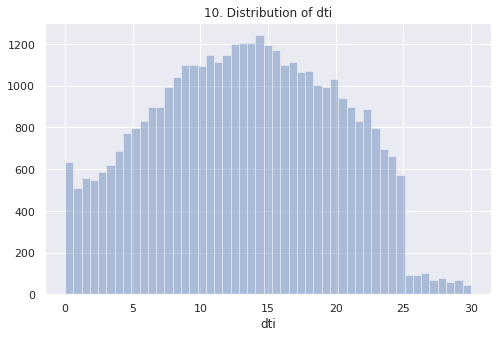

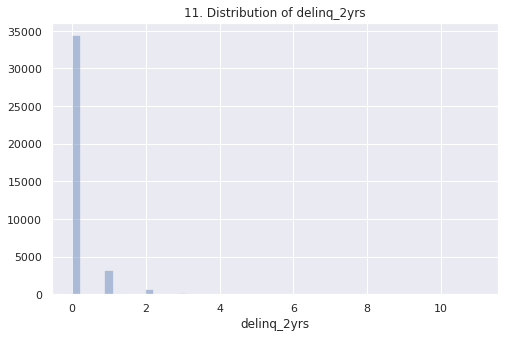

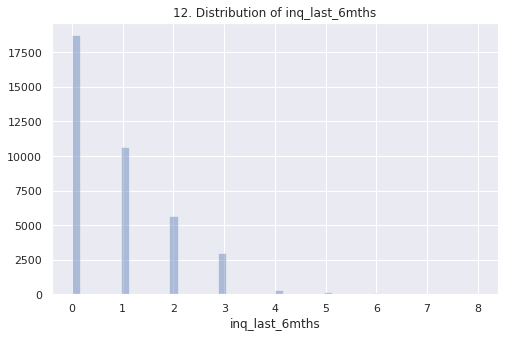

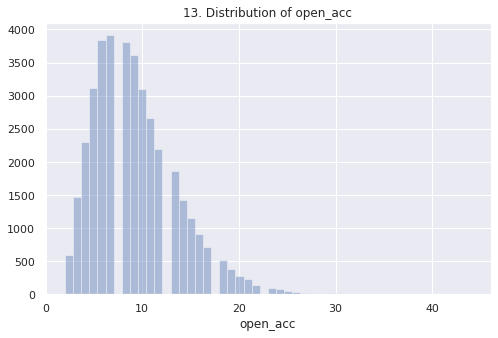

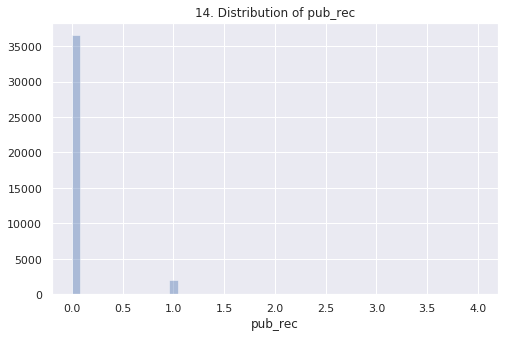

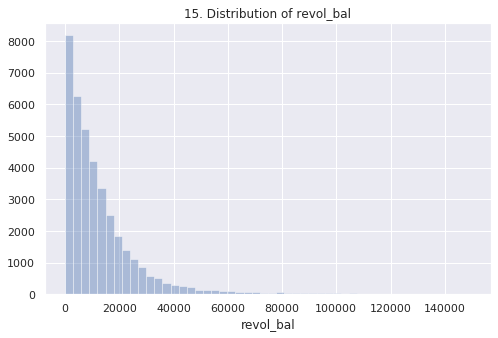

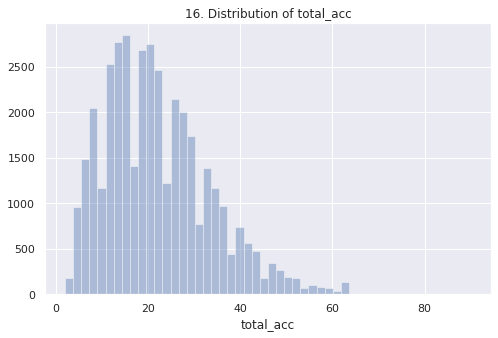

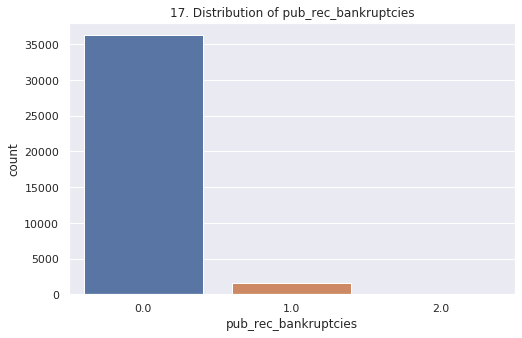

/media/data/anaconda3/envs/upgrad/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


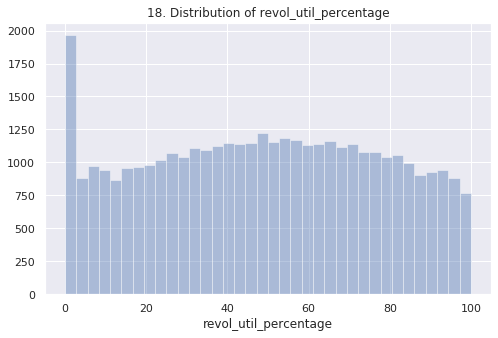

<Figure size 576x360 with 0 Axes>

In [437]:
# Iterate on all features and visulize distribution
# numerical - distplot
# categorical - countplot

sns.set(rc={'figure.figsize':(8,5)})
for idx, column in enumerate(df.columns):
    col = getattr(df, column)
    if col.dtype in ['int64', 'float64']:
        sns.distplot(x=col, kde=False)
    elif col.dtype.name in ['object']:
        sns.countplot(x=col)
    else:
        print("unknown column type {}:{}".format(col.name, col.dtype.name))
    plt.xlabel(col.name)
    plt.title("{}. Distribution of {}".format(str(idx + 1), col.name))
    plt.show()
    plt.clf()
    

### Handling outliers

### 1. Annual incomde - the presence of outliers in annual income makes anlaysis tough as the box plots are squeezed

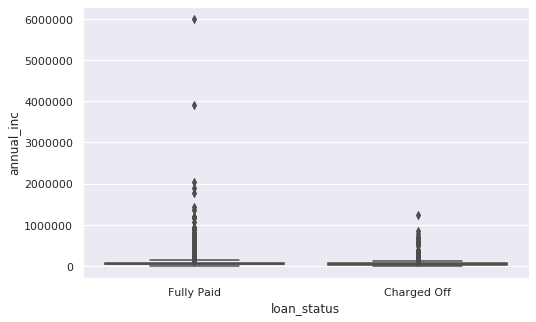

In [438]:
sns.boxplot(data=df, x='loan_status', y='annual_inc')

In [439]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.annual_inc.describe()

count     38577.000
mean      68777.974
std       64218.682
min        4000.000
25%       40000.000
50%       58868.000
75%       82000.000
max     6000000.000
Name: annual_inc, dtype: float64

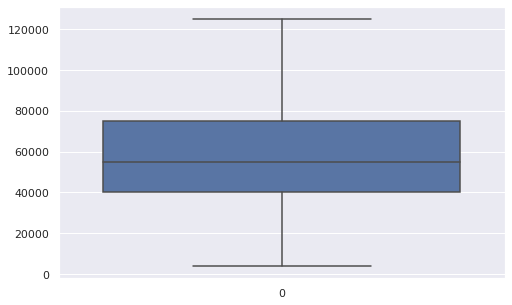

In [440]:
# creating filtred dataframe in which annual_inc more than 140000 is removed

filtered_df_by_annual_inc = df[df.annual_inc <= 125000]
sns.boxplot(data=filtered_df_by_annual_inc.annual_inc)

In [441]:
print("Rows removed by removing outliers annual income outliers: {}".format(len(df) - len(filtered_df_by_annual_inc)))

Rows removed by removing outliers annual income outliers: 2786


### Overview of relationship between **loan_status** and other features
 - The pupose is to get an overview of the relationship and then have a deeper look
 - We don't get the detailed picture here as we are getting count of defaults here against different categories, percentage of defaults will give a better picture

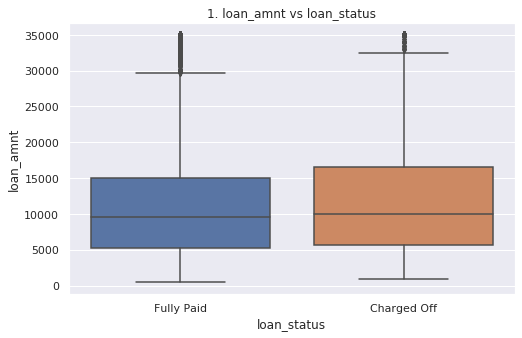

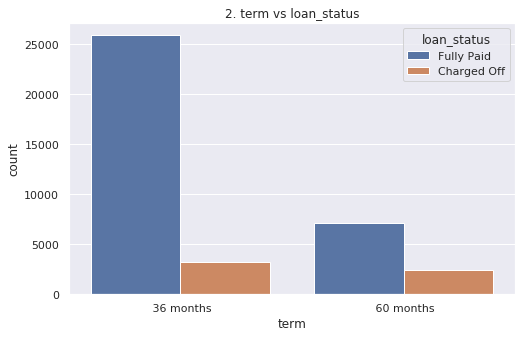

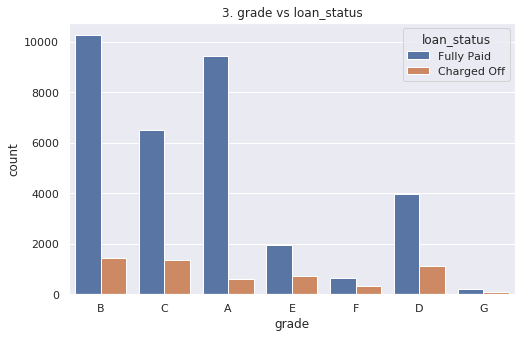

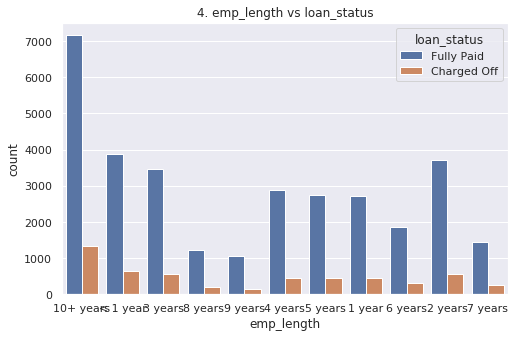

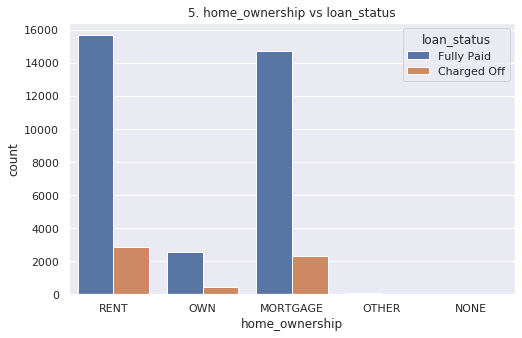

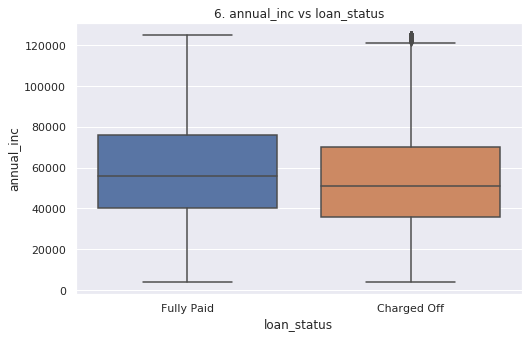

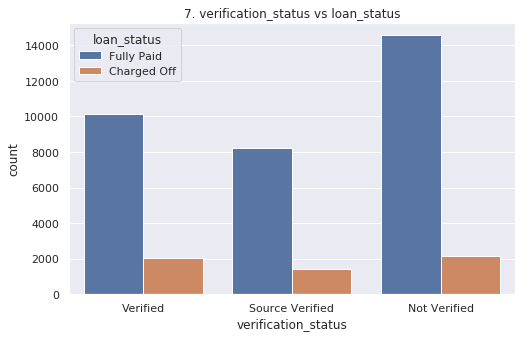

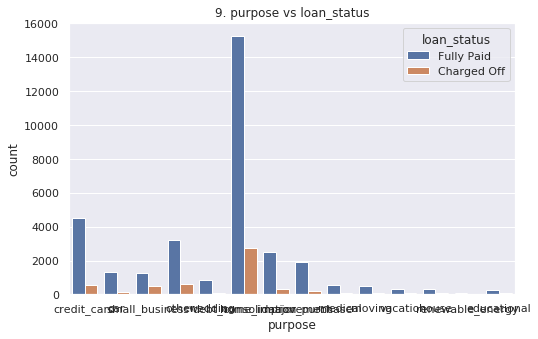

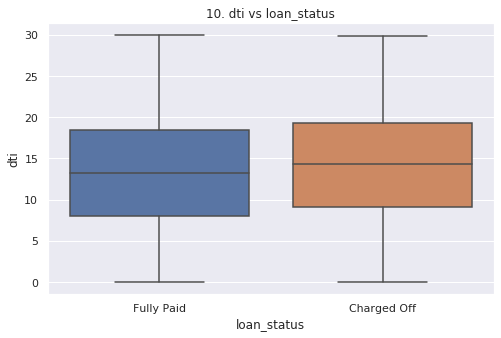

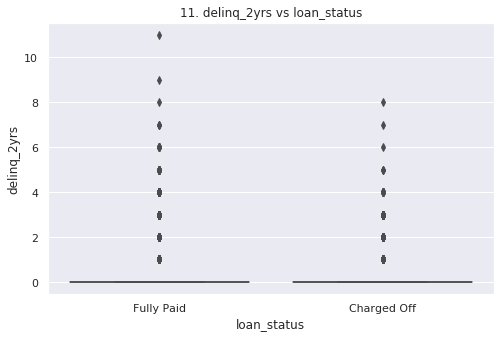

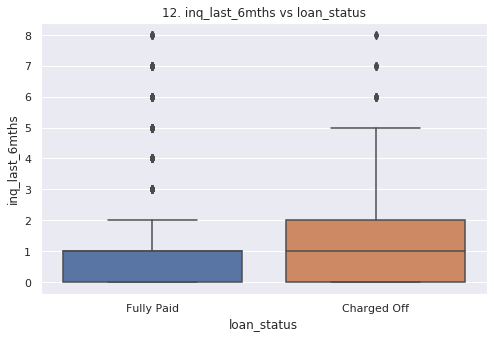

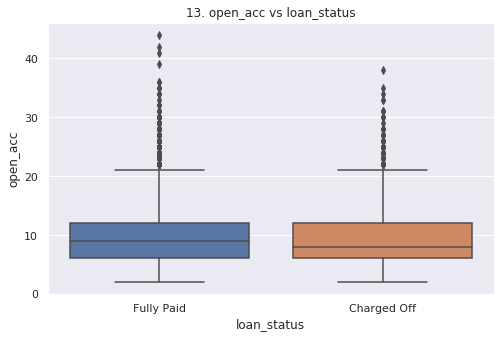

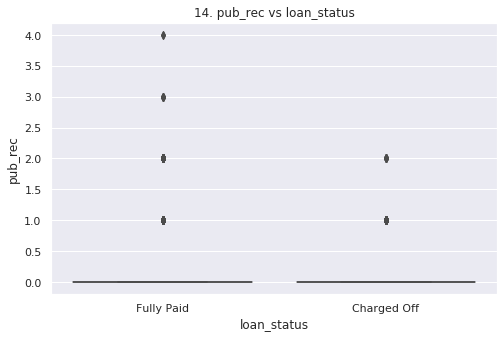

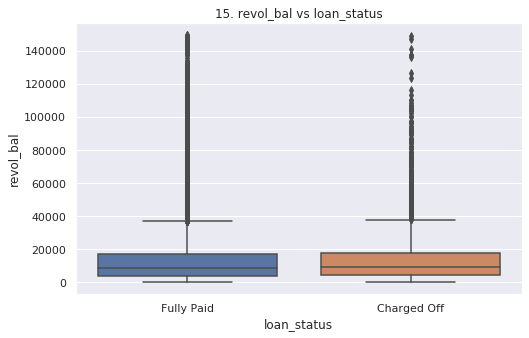

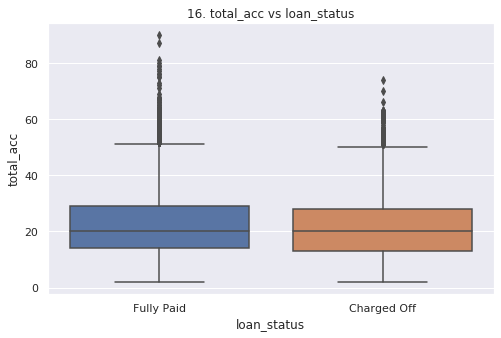

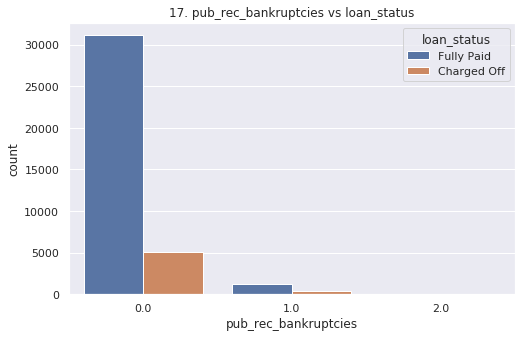

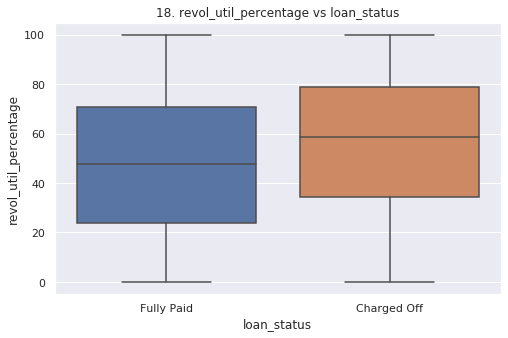

<Figure size 576x360 with 0 Axes>

In [442]:
target = 'loan_status'
for idx, column in enumerate(df.columns):
    col = getattr(df, column)

    if column == target:
        continue
    
    data_df = df.copy()
    if column == 'annual_inc':
        data_df = filtered_df_by_annual_inc
    
    if col.dtype in ['int64', 'float64']:
        sns.boxplot(x=target, y=column, data=data_df)
    elif col.dtype.name in ['object']:
        sns.countplot(x=column, hue='loan_status', data=data_df)
    else:
        print("unknown column type {}:{}".format(col.name, col.dtype.name))
    
    plt.title("{}. {} vs loan_status".format(str(idx + 1), col.name))
    plt.show()
    plt.clf()

### 1. How dti affects loan_status
 - we see below that the count of defaulters decrease after dti value of 15 but this could be because there are less people with dti value > 15 fully paing loan or defaulting
 - Looking at percentage of defaulters against dti bins shows increase in dti value increase chances of default, the rate of increase of default percentage with dti is not huge
 

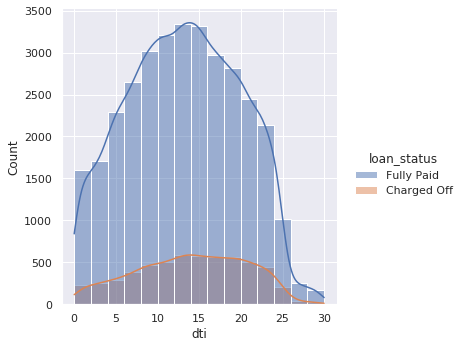

In [443]:
sns.set(rc={'figure.figsize':(10,8)})
sns.displot(data=df, x = 'dti', hue = 'loan_status', bins=15, kde=True)

,count,default_percentage,dti
0,1161,14.910,12 - 16
1,1127,16.270,16 - 20
2,978,13.530,8 - 12
3,942,17.040,20 - 24
4,675,12.000,4 - 8
5,452,12.460,0 - 4
6,239,16.090,24 - 28


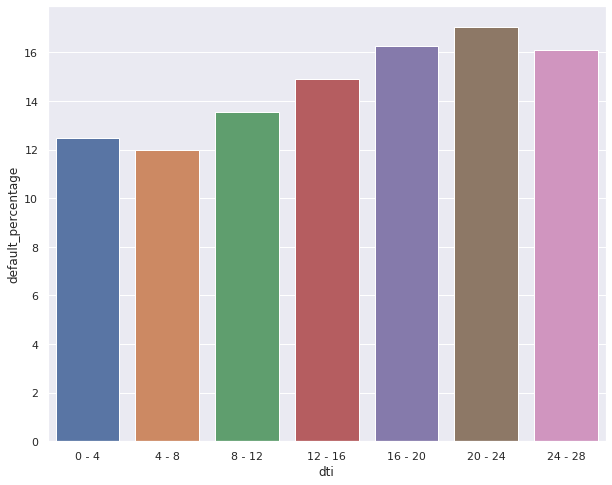

In [444]:
# categorical vs numerical relationship

# create dti bins of width 2

bins = list(range(0, 29, 4))
df['dti_bins'] = pd.cut(df['dti'], bins=bins)

# create another binned dti dataframe for loan_status == 'Charged Off'

filtered_df = df.loc[df.loan_status == 'Charged Off'].copy()
filtered_df['dti_bins'] = pd.cut(filtered_df['dti'], bins=bins)

# get count of defaulters and non defaulters in each bin

count_df = df['dti_bins'].value_counts().to_frame()
filtered_df = filtered_df['dti_bins'].value_counts().to_frame()

# calulate percentage of deaulters in each bin

filtered_df['default_percentage'] = filtered_df.apply(lambda value : round(filtered_df.dti_bins / count_df.dti_bins * 100, 2))
filtered_df['dti'] = filtered_df.index
filtered_df['dti'] = filtered_df.dti.apply(lambda value : str(value).replace("]", "").replace("(", "").replace(",", " -"))

filtered_df.reset_index(drop=True, inplace=True)
filtered_df.rename({'dti_bins': 'count'}, axis=1, inplace=True)

# plot bins and default percentage
sns.barplot(data=filtered_df, x='dti', y='default_percentage')
filtered_df

### 2. How loan amount affects loan status
- The percentage defaults plot shows that when loan amount is greater than 5000, the default percentage increases with loan amount


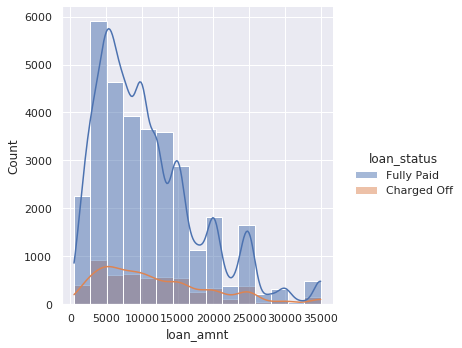

In [445]:
sns.displot(data=df, x = 'loan_amnt', hue = 'loan_status', bins=15, kde=True)

In [446]:
df.loan_amnt.describe()

count   38577.000
mean    11047.025
std      7348.442
min       500.000
25%      5300.000
50%      9600.000
75%     15000.000
max     35000.000
Name: loan_amnt, dtype: float64

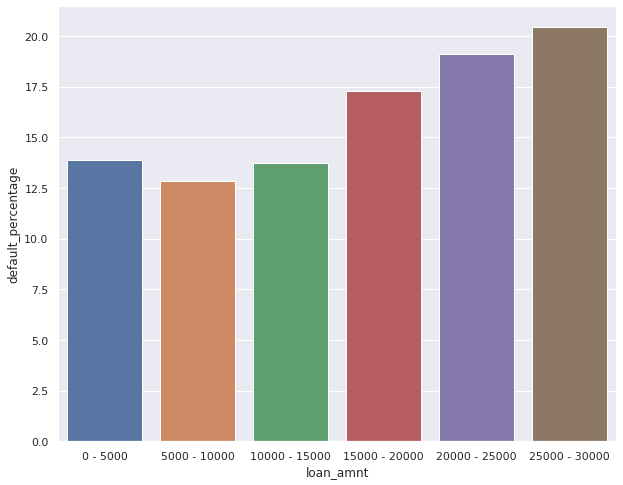

In [447]:
# categorical vs numerical relationship

# create loan_amnt bins of width 5000

feature = 'loan_amnt'
bins = list(range(0, 35000, 5000))
feature_column = getattr(df, feature)
df['{}_bins'.format(feature)] = pd.cut(feature_column, bins=bins)

# create another binned dti dataframe for loan_status == 'Charged Off'

filtered_df = df.loc[df.loan_status == 'Charged Off'].copy()
binned_col_name = '{}_bins'.format(feature)
filtered_df[binned_col_name] = pd.cut(filtered_df['loan_amnt'], bins=bins)

# get count of defaulters and non defaulters in each bin

count_df = df[binned_col_name].value_counts().to_frame()
filtered_df = filtered_df[binned_col_name].value_counts().to_frame()

# calulate percentage of deaulters in each bin

filtered_df['total_count'] = getattr(count_df, binned_col_name)
filtered_df.rename({binned_col_name: 'default_count'}, axis=1, inplace=True)

filtered_df['default_percentage'] = filtered_df.apply(lambda row :
                                                      round(row['default_count'] /
                                                            row['total_count'] * 100, 2), axis=1)
filtered_df[feature] = filtered_df.index
filtered_df[feature] = filtered_df[feature].apply(lambda value : str(value).replace("]", "").replace("(", "").replace(",", " -"))
filtered_df.reset_index(drop=True, inplace=True)

# plot bins and default percentage
sns.barplot(data=filtered_df, x=feature, y='default_percentage')

### 3. How term  affects loan status
- we observe a higher default percentage in term 60 months, double of that of the term with 36 months

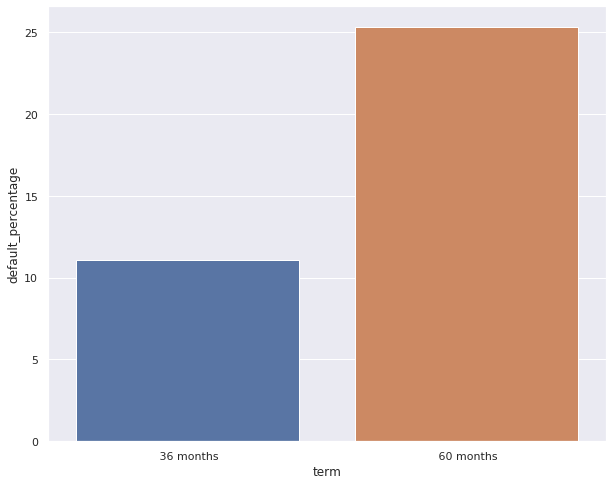

In [448]:
# categorical vs categorical relationship

feature = 'term'

# get counts of defaults and total

filtered_df = df.loc[df.loan_status == 'Charged Off'][[feature, "loan_status"]].copy()

filtered_df = filtered_df[feature].value_counts().to_frame()
filtered_df['total_count'] = df[feature].value_counts()
filtered_df.rename({feature: 'default_count'}, axis=1, inplace=True)

# calulate percentage of deaulters in each bin


filtered_df['default_percentage'] = filtered_df.apply(lambda row :
                                                      round(row['default_count'] /
                                                            row['total_count'] * 100, 2), axis=1)
filtered_df[feature] = filtered_df.index

# # plot bins and default percentage
sns.barplot(data=filtered_df, x=feature, y='default_percentage')

### 4. How grade affects loan_status
- The default rates increases from grade A to G

,default_count,total_count,default_percentage,grade
A,602,10045,5.990,A
B,1425,11675,12.210,B
C,1347,7834,17.190,C
D,1118,5085,21.990,D
E,715,2663,26.850,E
F,319,976,32.680,F
G,101,299,33.780,G


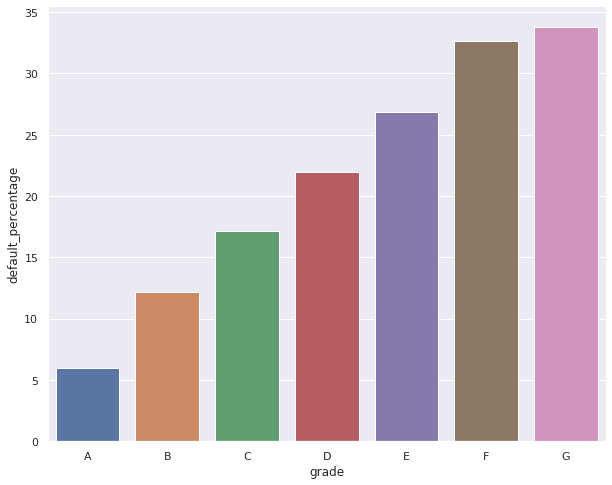

In [449]:
# categorical vs categorical relationship

feature = 'grade'

def view_relationship_bw_categorical_variables(plot_df, feature, sort_by="feature"):
    # get counts of defaults and total

    filtered_df = plot_df.loc[plot_df.loan_status == 'Charged Off'][[feature, "loan_status"]].copy()

    filtered_df = filtered_df[feature].value_counts().to_frame()
    filtered_df['total_count'] = df[feature].value_counts()
    filtered_df.rename({feature: 'default_count'}, axis=1, inplace=True)

    # calulate percentage of deaulters in each bin


    filtered_df['default_percentage'] = filtered_df.apply(lambda row :
                                                          round(row['default_count'] /
                                                                row['total_count'] * 100, 2), axis=1)
    filtered_df[feature] = filtered_df.index

    # # plot bins and default percentage
    if sort_by == 'feature':
        filtered_df = filtered_df.sort_values(by=feature)
    else:
        filtered_df = filtered_df.sort_values(by='default_percentage')
    sns.barplot(data=filtered_df, x=feature, y='default_percentage')
    return filtered_df
    
view_relationship_bw_categorical_variables(df, feature)

### 5. How emp_length affects loan_status
- No co-relation observed 

,default_count,total_count,default_percentage,emp_length
9 years,158,1226,12.890,9 years
2 years,567,4291,13.210,2 years
4 years,462,3342,13.820,4 years
3 years,555,4012,13.830,3 years
8 years,203,1435,14.150,8 years
6 years,307,2168,14.160,6 years
< 1 year,639,4508,14.170,< 1 year
5 years,458,3194,14.340,5 years
1 year,456,3169,14.390,1 year
7 years,263,1711,15.370,7 years


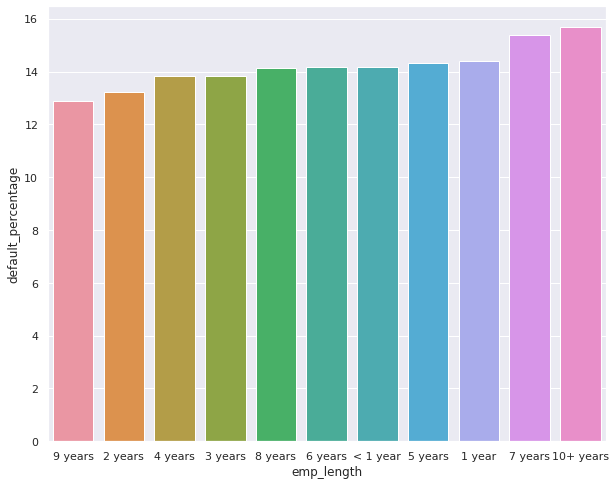

In [450]:
view_relationship_bw_categorical_variables(df, "emp_length", sort_by='target')

### 6. How home_ownership affects loan_status
- The chances of default is slightly less for customers who are paying mortgage of their homes followed by people who own followed by people who live in a rented home
- However the difference between the impact of home_ownership feature is marginal

,default_count,total_count,default_percentage,home_ownership
MORTGAGE,2327,17021,13.670,MORTGAGE
OWN,443,2975,14.890,OWN
RENT,2839,18480,15.360,RENT
OTHER,18,98,18.370,OTHER


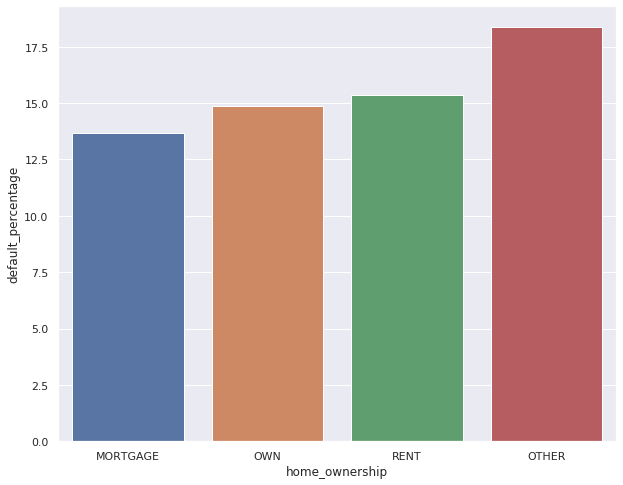

In [451]:
view_relationship_bw_categorical_variables(df, "home_ownership", sort_by='target')

### 7. How purpose affects loan_status
    - Purpose small_business is among the top defaulters followed by renewable energy and education
    - Purpose wedding, car, credit card among low defaulters

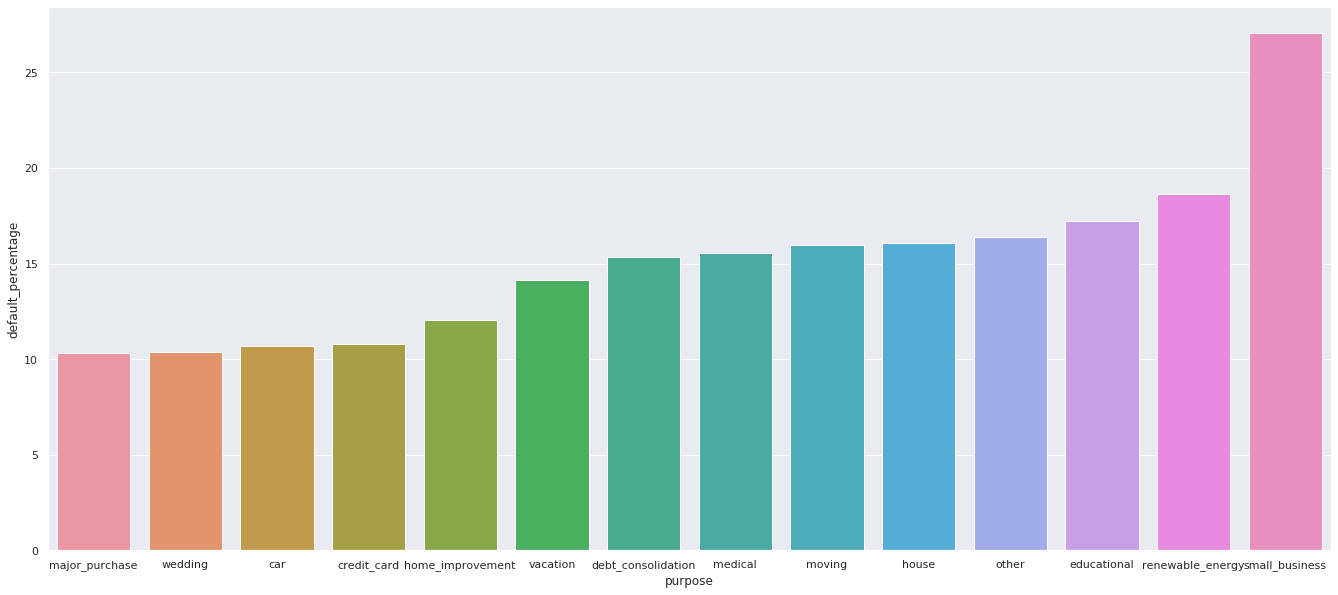

In [452]:
sns.set(rc={'figure.figsize':(23,10)})
view_relationship_bw_categorical_variables(df, "purpose", sort_by="target")
sns.set(rc={'figure.figsize':(10, 8)})

### 8. How delinq_2yrs  affects loan_status
- No clear relationship observed

,default_count,total_count,default_percentage,delinq_2yrs
6,1,10,10.000,6
5,3,21,14.290,5
0,4936,34386,14.350,0
1,507,3207,15.810,1
3,35,212,16.510,3
2,130,673,19.320,2
4,13,60,21.670,4
7,1,4,25.000,7
8,1,2,50.000,8


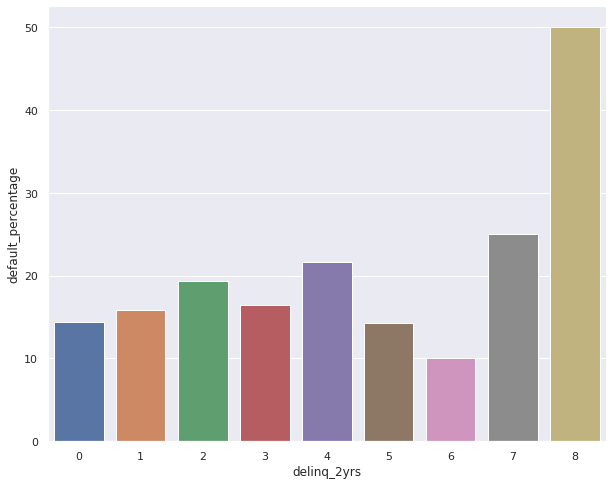

In [453]:
# delinq_2yrs has few categories, we can treat it as a categorical variable
df['delinq_2yrs'] = df.delinq_2yrs.astype('object')
view_relationship_bw_categorical_variables(df, "delinq_2yrs", sort_by="target")

### 9. How inq_last_6mths affects loan_status
 - We see that as the count of enquires in last 6 month increases the default rate increases

In [454]:
# function to view_categorical_and_numerical_relationship

def view_categorical_and_numerical_relationship(plot_df, feature, bins):
    feature_column = getattr(plot_df, feature)
    plot_df['{}_bins'.format(feature)] = pd.cut(feature_column, bins=bins)

    # create another binned dti dataframe for loan_status == 'Charged Off'

    filtered_df = plot_df.loc[plot_df.loan_status == 'Charged Off'].copy()
    binned_col_name = '{}_bins'.format(feature)
    filtered_df[binned_col_name] = pd.cut(filtered_df[feature], bins=bins)

    # get count of defaulters and non defaulters in each bin

    count_df = plot_df[binned_col_name].value_counts().to_frame()
    filtered_df = filtered_df[binned_col_name].value_counts().to_frame()

    # calulate percentage of deaulters in each bin

    filtered_df['total_count'] = getattr(count_df, binned_col_name)
    filtered_df.rename({binned_col_name: 'default_count'}, axis=1, inplace=True)

    filtered_df['default_percentage'] = filtered_df.apply(lambda row :
                                                          round(row['default_count'] /
                                                                row['total_count'] * 100, 2), axis=1)
    filtered_df[feature] = filtered_df.index
    filtered_df[feature] = filtered_df[feature].apply(lambda value : str(value).replace("]", "").replace("(", "").replace(",", " -"))
    filtered_df.reset_index(drop=True, inplace=True)

#     plot bins and default percentage
    sns.barplot(data=filtered_df, x=feature, y='default_percentage')
    return filtered_df

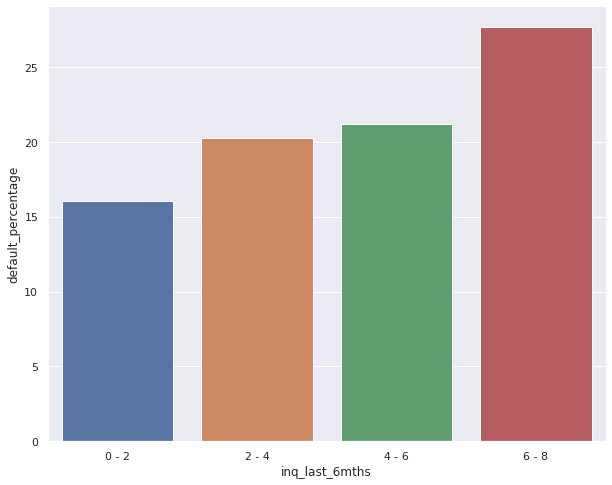

In [455]:
# let's create bin of width 2
bins = list(range(0, 9, 2))
filtered_df = view_categorical_and_numerical_relationship(fil_df, "inq_last_6mths", bins)

### 10. How open_acc affects loan_status
- No co-relation observed

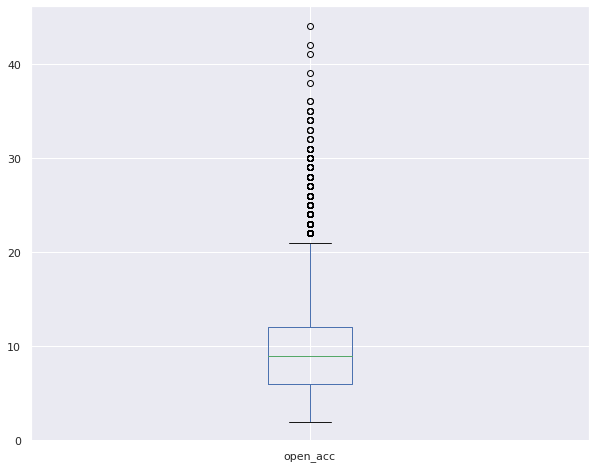

In [456]:
# open_acc has some outliers, let's remove them
df.open_acc.plot.box()
fil_df  = df.loc[df.open_acc <=21]

/home/rishav/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


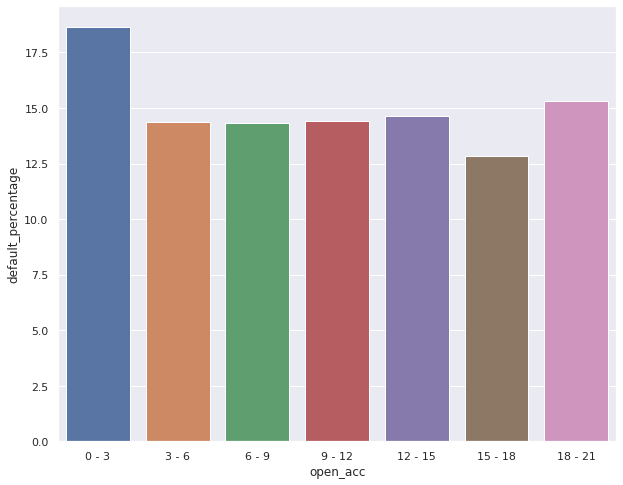

In [457]:
# let's create bin of width 3
bins = list(range(0, 22, 3))
filtered_df = view_categorical_and_numerical_relationship(fil_df, "open_acc", bins)

### 11. How annual_inc affects loan_status
 - As the income increases to 125000, we see the default rate decreases
 - Note the outliers are removed here

In [458]:
df.annual_inc.describe()

count     38577.000
mean      68777.974
std       64218.682
min        4000.000
25%       40000.000
50%       58868.000
75%       82000.000
max     6000000.000
Name: annual_inc, dtype: float64

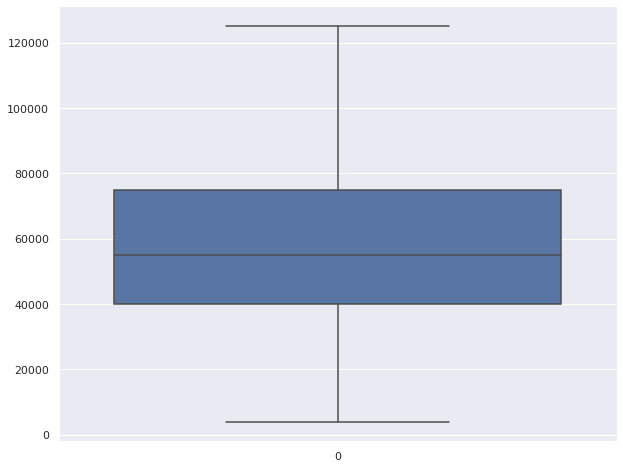

In [459]:
# creating filtred dataframe in which annual_inc more than 140000 is removed

filtered_df_by_annual_inc = df[df.annual_inc <= 125000]
sns.boxplot(data=filtered_df_by_annual_inc.annual_inc)

/home/rishav/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


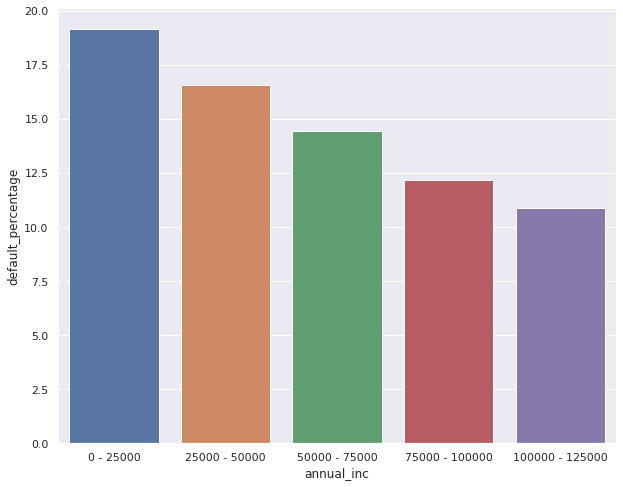

In [460]:
# let's create bin of width 3
bins = list(range(0, 125001, 25000))
filtered_df = view_categorical_and_numerical_relationship(filtered_df_by_annual_inc, "annual_inc", bins)